In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import tensorflow as tf
import re

# Importing required libraries
import json
import tensorflow as tf
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection import KFold


#print how many rows and columns are there in the csv file
df = pd.read_csv('train-balanced-sarcasm.csv')


df_useful_x = df[['comment','label']]
df_useful_y = df[['label']]
df_useful_x['comment'] = df_useful_x['comment'].astype('str')

df_useful_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 2 columns):
comment    1010826 non-null object
label      1010826 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.4+ MB


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
df_useful_x
df_useful_x['pre_clean_len'] = [len(t) for t in df_useful_x.comment]
df_useful_x


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,comment,label,pre_clean_len
0,NC and NH.,0,10
1,You do know west teams play against west teams...,0,74
2,"They were underdogs earlier today, but since G...",0,121
3,"This meme isn't funny none of the ""new york ni...",0,60
4,I could use one of those tools.,0,31
...,...,...,...
1010821,I'm sure that Iran and N. Korea have the techn...,1,92
1010822,"whatever you do, don't vote green!",1,34
1010823,Perhaps this is an atheist conspiracy to make ...,1,66
1010824,The Slavs got their own country - it is called...,1,53


In [7]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def text_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()



#nums = [0,1010826]
nums = [0,1010826]
print ("Cleaning and parsing the comments...\n")
clean_comment_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print ("comments %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
    clean_comment_texts.append(text_cleaner(df_useful_x['comment'][i]))
    
clean_df = pd.DataFrame(clean_comment_texts,columns=['comment'])

clean_df.head()


Cleaning and parsing the comments...

comments 10000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 20000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 30000 of 1010826 has been processed
comments 40000 of 1010826 has been processed
comments 50000 of 1010826 has been processed
comments 60000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'...........'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 70000 of 1010826 has been processed
comments 80000 of 1010826 has been processed
comments 90000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.......'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 100000 of 1010826 has been processed
comments 110000 of 1010826 has been processed
comments 120000 of 1010826 has been processed
comments 130000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'........'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'Music'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 140000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 150000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'......'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 160000 of 1010826 has been processed
comments 170000 of 1010826 has been processed
comments 180000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'Downloads'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 190000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'C:'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 200000 of 1010826 has been processed
comments 210000 of 1010826 has been processed
comments 220000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'c:'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 230000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'Desktop'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 240000 of 1010826 has been processed
comments 250000 of 1010826 has been processed
comments 260000 of 1010826 has been processed
comments 270000 of 1010826 has been processed
comments 280000 of 1010826 has been processed
comments 290000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.............'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 300000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'..........'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 310000 of 1010826 has been processed
comments 320000 of 1010826 has been processed
comments 330000 of 1010826 has been processed
comments 340000 of 1010826 has been processed
comments 350000 of 1010826 has been processed
comments 360000 of 1010826 has been processed
comments 370000 of 1010826 has been processed
comments 380000 of 1010826 has been processed
comments 390000 of 1010826 has been processed
comments 400000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.............................'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 410000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'Music.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 420000 of 1010826 has been processed
comments 430000 of 1010826 has been processed
comments 440000 of 1010826 has been processed
comments 450000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'... ...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 460000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.................'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 470000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'music'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 480000 of 1010826 has been processed
comments 490000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'... ............................................'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 500000 of 1010826 has been processed
comments 510000 of 1010826 has been processed
comments 520000 of 1010826 has been processed
comments 530000 of 1010826 has been processed
comments 540000 of 1010826 has been processed
comments 550000 of 1010826 has been processed
comments 560000 of 1010826 has been processed
comments 570000 of 1010826 has been processed
comments 580000 of 1010826 has been processed
comments 590000 of 1010826 has been processed
comments 600000 of 1010826 has been processed
comments 610000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.........'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 620000 of 1010826 has been processed
comments 630000 of 1010826 has been processed
comments 640000 of 1010826 has been processed
comments 650000 of 1010826 has been processed
comments 660000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'..............'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 670000 of 1010826 has been processed
comments 680000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 690000 of 1010826 has been processed
comments 700000 of 1010826 has been processed
comments 710000 of 1010826 has been processed
comments 720000 of 1010826 has been processed
comments 730000 of 1010826 has been processed
comments 740000 of 1010826 has been processed
comments 750000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'\\'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


comments 760000 of 1010826 has been processed
comments 770000 of 1010826 has been processed
comments 780000 of 1010826 has been processed
comments 790000 of 1010826 has been processed
comments 800000 of 1010826 has been processed
comments 810000 of 1010826 has been processed
comments 820000 of 1010826 has been processed
comments 830000 of 1010826 has been processed
comments 840000 of 1010826 has been processed
comments 850000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "http://localhost:88/emblem-bot/index.php" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


comments 860000 of 1010826 has been processed
comments 870000 of 1010826 has been processed
comments 880000 of 1010826 has been processed
comments 890000 of 1010826 has been processed
comments 900000 of 1010826 has been processed
comments 910000 of 1010826 has been processed
comments 920000 of 1010826 has been processed
comments 930000 of 1010826 has been processed


C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "http://last.word/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


comments 940000 of 1010826 has been processed
comments 950000 of 1010826 has been processed
comments 960000 of 1010826 has been processed
comments 970000 of 1010826 has been processed
comments 980000 of 1010826 has been processed
comments 990000 of 1010826 has been processed
comments 1000000 of 1010826 has been processed
comments 1010000 of 1010826 has been processed


,comment
0,nc and nh
1,you do know west teams play against west teams...
2,they were underdogs earlier today but since gr...
3,this meme isn t funny none of the new york nig...
4,i could use one of those tools


In [9]:
labels = df_useful_y['label'].to_list()
sentences = clean_df['comment'].to_list()

In [10]:
# Splitting the dataset into Train and Test
training_size = round(len(clean_df) * .75)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


# Setting tokenizer properties
vocab_size = 10000
oov_tok = "<oov>"

# Fit the tokenizer on Training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Setting the padding properties
max_length = 100
trunc_type='post'
padding_type='post'


# Creating padded sequences from train and test data
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# Setting the model
embedding_dim = 16


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 16)           784       
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 161,217
Trainable params: 161,217
Non-trainable params: 0
________________________________________________

In [15]:
# Converting the lists to numpy arrays for Tensorflow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Training the model
num_epochs = 5

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 758120 samples, validate on 252706 samples
Epoch 1/5
758120/758120 - 57s - loss: 0.5763 - accuracy: 0.6961 - val_loss: 0.5468 - val_accuracy: 0.7200
Epoch 2/5
758120/758120 - 58s - loss: 0.5443 - accuracy: 0.7227 - val_loss: 0.5420 - val_accuracy: 0.7231
Epoch 3/5
758120/758120 - 58s - loss: 0.5313 - accuracy: 0.7323 - val_loss: 0.5414 - val_accuracy: 0.7252
Epoch 4/5
758120/758120 - 57s - loss: 0.5219 - accuracy: 0.7396 - val_loss: 0.5429 - val_accuracy: 0.7244
Epoch 5/5
758120/758120 - 56s - loss: 0.5142 - accuracy: 0.7452 - val_loss: 0.5409 - val_accuracy: 0.7257


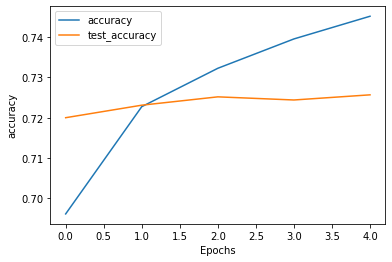

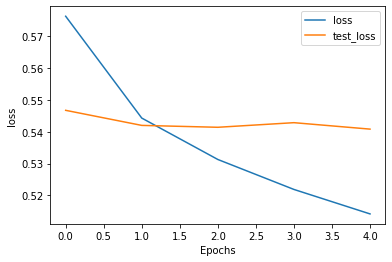

In [17]:

#We need confusion matrices, precision/recall curves, and ROC curves


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'test_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

plt.show()

In [18]:
score = model.evaluate(testing_padded, testing_labels, verbose=0)
print("\nTest loss: {} Test accuracy: {}".format(score[0], score[1]))


Test loss: 0.5408593560615609 Test accuracy: 0.7256812453269958


In [20]:
def generate_actual_predicted(model, X_test, Y_test):
    
    ######### ENTER YOUR CODE HERE #########
    # Get the predictions
    Y_pred = model.predict(X_test)

    # Create a list of predictions

    #Converting predictions to label
    predicted = list()
    for i in range(len(Y_pred)):
        predicted.append(np.argmax(Y_pred[i]))

    #Converting one hot encoded test label back to label
    actual = list()
    for i in range(len(Y_test)):
        actual.append(np.argmax(Y_test[i]))

        
    ########################################

    return Y_pred, predicted, actual

from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()
training_labels=training_labels.reshape(-1,1)
testing_labels=testing_labels.reshape(-1,1)

training_labels = ohe.fit_transform(training_labels).toarray()
testing_labels = ohe.fit_transform(testing_labels).toarray()
Y_pred, predicted, actual = generate_actual_predicted(model, testing_padded, testing_labels)

C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predicted)
print(cm)

[[115767      0]
 [136939      0]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

C:\Users\Abdul Ahad Khan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.46      1.00      0.63    115767
           1       0.00      0.00      0.00    136939

    accuracy                           0.46    252706
   macro avg       0.23      0.50      0.31    252706
weighted avg       0.21      0.46      0.29    252706



In [24]:
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

n_classes = 10

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testing_labels[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

########################################


IndexError: index 1 is out of bounds for axis 1 with size 1